### Assignment 2 Submission - Asset Pricing
> Student Name : Ankit Rawat

> Batch : G2 

### Import Libraries

In [192]:
import pandas as pd
import random
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import datetime
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplot, scatter, plot, axis
from scipy.stats import linregress
import ast 
import re
import seaborn as sns
import plotly.figure_factory as ff
import plotly.graph_objs as go
import scipy.stats as stats
import numpy as np
from sklearn.linear_model import LinearRegression

pd.set_option("display.notebook_repr_html", False)
pd.set_option("display.max_columns", 12)
pd.set_option("display.width", 80)
pd.set_option("precision", 3)


In [193]:
%matplotlib inline
pd.set_option("max_rows", 10)
pd.set_option("min_rows", 8)

### Load Data 

In [194]:
data_indus_Portfolio  = pd.read_csv("Industry_Portfolios.csv")
df_market_Portfolio = pd.read_csv("Market_Portfolio.csv")


### Indexing

In [195]:
data_indus_Portfolio.set_index( "Date", inplace =True)
df_market_Portfolio.set_index( "Date", inplace =True)


In [196]:
print ( "Industries Portfolio data :\n  {} ".format(data_indus_Portfolio))
print ( " market_Portfolio : \n {} ".format(df_market_Portfolio))


Industries Portfolio data :
          NoDur  Durbl  Manuf  Enrgy  HiTec  Telcm  Shops  Hlth  Utils  Other
Date                                                                       
200401   0.06  -1.07  -0.62   0.44   4.53   1.41   0.45  3.09   1.92   2.88
200402   4.25  -0.07   1.95   4.69  -2.92  -0.52   6.09  0.89   2.07   2.16
200403  -0.09  -1.15  -0.27  -0.13  -2.55  -2.07   0.29 -3.96   1.13  -0.63
200404   1.42   2.30  -0.17   2.52  -4.91  -0.48  -2.70  3.54  -3.55  -3.76
...       ...    ...    ...    ...    ...    ...    ...   ...    ...    ...
201309   1.94   6.46   5.20   2.03   3.77   4.33   4.46  4.19   1.05   3.83
201310   4.75   0.72   4.56   4.86   3.80   5.52   5.08  3.47   3.35   3.87
201311   1.29   1.81   2.95   0.85   3.65   0.27   3.67  4.54  -1.81   4.74
201312   2.65   1.18   3.13   2.95   4.04   3.96   0.20  0.71   1.79   3.11

[120 rows x 10 columns] 
 market_Portfolio : 
         Market
Date          
200401    2.22
200402    1.46
200403   -1.23
200404   -1

### Fixed Variables 
> Risk Free Rate

In [197]:
Rf  = 0.13


### Calculate mean returns

In [198]:
R = pd.DataFrame(data_indus_Portfolio.mean())
R_array = np.array(R)

In [199]:
print ("Expected Mean of the given data is :\n {} ".format(R))

Expected Mean of the given data is :
            0
NoDur  0.903
Durbl  0.733
Manuf  1.013
Enrgy  1.231
HiTec  0.766
Telcm  0.881
Shops  0.916
Hlth   0.784
Utils  0.907
Other  0.489 


### Market Risk Premium 

In [200]:
df_market_Portfolio[ "Market_Risk_Premium" ] =  df_market_Portfolio[ "Market"] -  0.13

In [201]:
print ("Market Risk Premium  :\n {} ".format(df_market_Portfolio[ "Market_Risk_Premium" ] ))


Market Risk Premium  :
 Date
200401    2.09
200402    1.33
200403   -1.36
200404   -1.88
          ... 
201309    3.63
201310    4.04
201311    2.99
201312    2.68
Name: Market_Risk_Premium, Length: 120, dtype: float64 


###  Create Matrix  : e = (1....1)'

In [202]:
e = pd.DataFrame([1] * len( data_indus_Portfolio))
e  = np.array(e)


### Estimate intercept coefficeint and slope  coefficient for each of the ten insudtry portfolios

In [203]:
data_indus_Portfolio_premium = np.subtract(data_indus_Portfolio , Rf * e)
data_indus_Portfolio_premium
intercept_Slope  = []
for i in data_indus_Portfolio_premium.columns:
    test = pd.concat([df_market_Portfolio["Market_Risk_Premium"],data_indus_Portfolio_premium[i]], axis=1)
    test = test.astype("Float64")
    c = test.columns[1]
    slope, intercept, r_value, p_value, std_err = stats.linregress(test["Market_Risk_Premium"], test[i])
    intercept_Slope.append([i,intercept, slope])

df = pd.DataFrame(intercept_Slope, columns = ["Domain","Intercept","Beta"])
df = pd.concat([df.reset_index(),R.reset_index()],axis =1).drop(columns = {"index"}).rename( columns = {0:"Mean"} )



In [204]:
df

  Domain  Intercept   Beta   Mean
0  NoDur      0.369  0.653  0.903
1  Durbl     -0.416  1.649  0.733
2  Manuf      0.160  1.170  1.013
3  Enrgy      0.502  0.970  1.231
4  HiTec     -0.064  1.133  0.766
5  Telcm      0.195  0.901  0.881
6  Shops      0.275  0.826  0.916
7   Hlth      0.238  0.673  0.784
8  Utils      0.445  0.538  0.907
9  Other     -0.387  1.207  0.489

### Economic Significance of slope coefficient
Slope ( Beta ) of the SML indicates the return per unit of risk required by all the investros.
Movement along the SML line demonstrates a change in the risk characteristics of a specific investment.
It can be used to  interprete the following information:

1. Beta < 0: Asset generally moves in the opposite direction as compared to the index.
2. Beta =  0: Movement of the asset is uncorrelated with the movement of the benchmark.
3. 0 < Beta <1: Movement of the asset is generally in the same direction as, but less than the movement of the benchmark.
4. Beta = 1: Movement of the asset is generally in the same direction as, and about the same amount as, the movement of the benchmark.
5. Beta > 1: Movement of the asset is generally in the same direction as, but more than, the movement of the benchmark.

### Economic Significance of Intercept
> 1. Intercept / Risk free asset  has 0 Beta hence can be considered as minimum return expected for 0 systematic risk on portfolio which has risk free asset.
> 2. Intercept helps to calcualte risk premium invetor would be looking for taking considering amount of Systematic Risk 

### 2. Mean Monthly return for each of the ten industry portfolios and the market poftfolio on the corresponding betas

In [205]:
print("Mean Monthly  Return of the ten industry portfolios : \n {}".format(df[["Domain","Mean"]]))
print("Mean Monthly  Return of the expected Reutrn : \n {}".format(df_market_Portfolio["Market"].mean()))

Mean Monthly  Return of the ten industry portfolios : 
   Domain   Mean
0  NoDur  0.903
1  Durbl  0.733
2  Manuf  1.013
3  Enrgy  1.231
4  HiTec  0.766
5  Telcm  0.881
6  Shops  0.916
7   Hlth  0.784
8  Utils  0.907
9  Other  0.489
Mean Monthly  Return of the expected Reutrn : 
 0.7480833333333334


### Slope and Intercept 

In [206]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df["Beta"],df["Mean"])
print (slope,intercept)

-0.18263925187237878 1.0399412501672844


Text(0.5, 0, 'Beta')

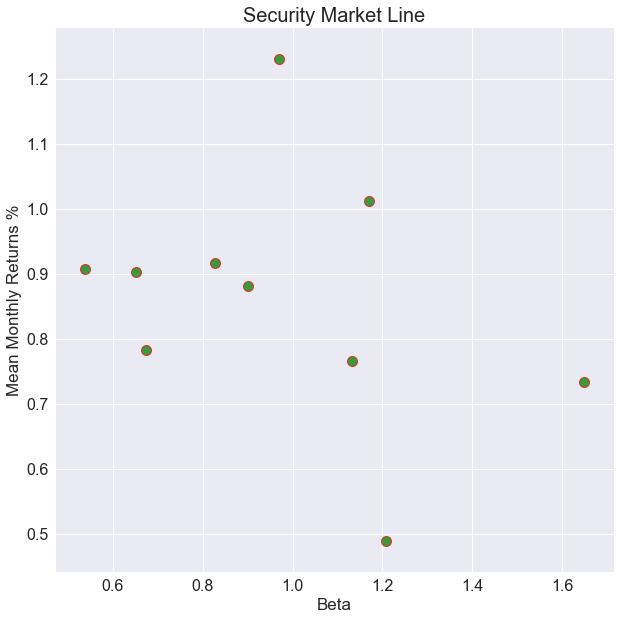

In [210]:
plt.figure( figsize = (10,10))
plt.style.use('seaborn')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Beta",fontsize = 17)
plt.ylabel("Mean Monthly Returns",fontsize = 17)
plt.title("Security Market Line", fontdict={'fontsize': 20})
plt.scatter(df["Beta"],df["Mean"],s=100,c ='green',edgecolor = 'red',linewidth = 1,alpha = 0.75,cmap = 'Greens')
plt.ylabel("Mean Monthly Returns %",fontsize = 17)
plt.title("Security Market Line", fontdict={'fontsize': 20})
plt.xlabel("Beta",fontsize = 17)

### 3.SML in the range of beta from zero to 2 on the horizontal axis

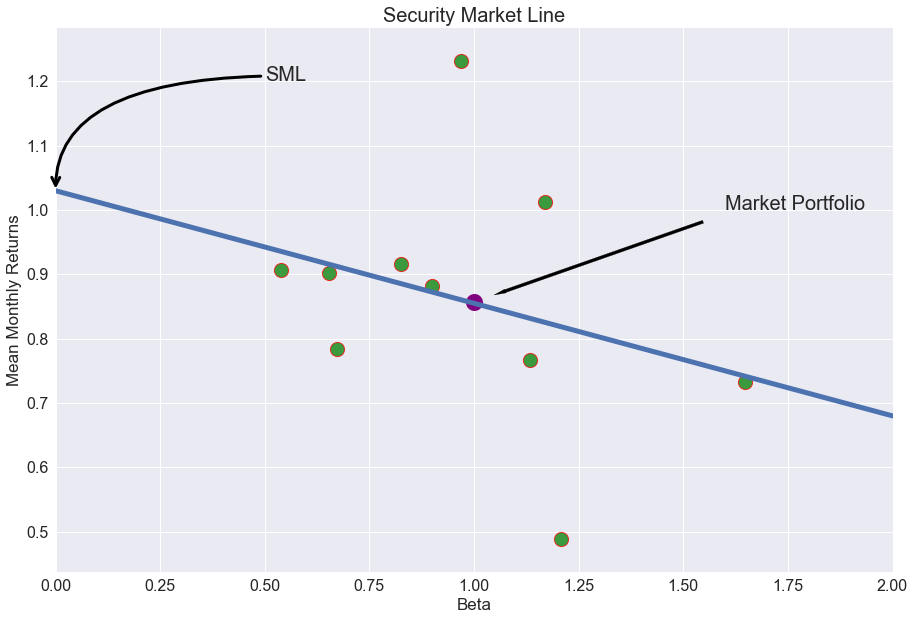

In [211]:
plt.figure( figsize = (15,10))
plt.style.use('seaborn')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Beta",fontsize = 17)
plt.ylabel("Mean Monthly Returns",fontsize = 17)
plt.title("Security Market Line", fontdict={'fontsize': 20})

plt.scatter(df["Beta"],df["Mean"],s=200,c ='green',edgecolor = 'red',linewidth = 1,alpha = 0.75,cmap = 'Greens')

plt.xlim(0,2)
x_axis = [0,2]
y_axis = [1.03,-0.18 *2 + 1.04]
plt.plot(x_axis, y_axis,linewidth =5 )

plt.scatter(1,-0.183 *1 + 1.04,linewidth = 10,color = "purple")

plt.annotate('Market Portfolio', xy=(1,-0.183 *1 + 1.04), xytext=(1.60,1),
             arrowprops=dict(facecolor='black', shrink=0.08, headwidth=4, width=3),size=20)
plt.annotate('SML', xy=(0, 1.03), xytext=(0.50, 1.2),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90",linewidth = 3),size=20);
plt.show()

### Economic Significance of The SML

The security market line is commonly used by money managers and investors to evaluate an investment product that they're thinking of including in a portfolio. The SML is useful in determining whether the security offers a favorable expected return compared to its level of risk.

When a security is plotted on the SML chart, if it appears above the SML, it is considered undervalued because the position on the chart indicates that the security offers a greater return against its inherent risk.

Conversely, if the security plots below the SML, it is considered overvalued in price because the expected return does not overcome the inherent risk.

The SML is frequently used in comparing two similar securities that offer approximately the same return, in order to determine which of them involves the least amount of inherent market risk relative to the expected return. The SML can also be used to compare securities of equal risk to see which one offers the highest expected return against that level of risk.